![人工智慧 - 自由團隊](https://raw.githubusercontent.com/chenkenanalytic/img/master/af/aifreeteam.png)
# AI . FREE Team
* [官方網站](https://ai-free-team.github.io/)
* [FB粉絲團](https://www.facebook.com/aifreeteam)

# License

> Copyright (c) 2021, NVIDIA CORPORATION & AFFILIATES. All rights reserved.
> Licensed under the Apache License, Version 2.0 (the "License"); you may not > > use this file except in compliance with the License. You may obtain a copy of > the License at
> 
> http://www.apache.org/licenses/LICENSE-2.0
> 
> Unless required by applicable law or agreed to in writing, software > distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

# 2. 資料前處理(Data Preprocess)
* 匯入資料集
* 認識資料集
* 產出 Nemo 可接受的資料集格式(JSON)

## 2.0 安裝&載入套件

In [1]:
import pandas as pd 

In [5]:
BRANCH = "main"

# 這五行執行過後就可以 comment 起來了，避免後續再次執行
# !sudo apt-get install sox libsndfile1 ffmpeg
# !sudo pip install wget text-unidecode
# !python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[all]
# !wget https://raw.githubusercontent.com/NVIDIA/NeMo/main/nemo_text_processing/install_pynini.sh
# !bash install_pynini.sh

In [11]:
from nemo_text_processing.text_normalization.normalize import Normalizer

[NeMo W 2022-12-23 19:55:13 optimizers:55] Apex was not found. Using the lamb or fused_adam optimizer will error out.


In [12]:
# 用於 2.2
import IPython.display as ipd
import librosa
import random

In [13]:
# 用於 2.3
from tqdm import tqdm
import json

# 這一行執行過後就可以 comment 起來了，避免後續再次執行
# !pip install --upgrade matplotlib==3.1.3
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 40.9 MB 1.2 MB/s eta 0:00:01
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp39-cp39-linux_x86_64.whl size=8490008 sha256=5756befbb3df9e82904ace4edadfde3baca88866ef93a66aeccea5329b575076
  Stored in directory: /tmp/pip-ephem-wheel-cache-mc5cjiz7/wheels/88/5f/33/d7b8943eba74fdfbd535c83cefcf366c25b0f9cb6424e763e7
Successfully built matplotlib


In [17]:
# 這一行執行過後就可以 comment 起來了，避免後續再次執行

# 請將 /path/to/LJSpeech-1.1.tar.bz2 換成正確的路徑
# !tar -xf /path/to/LJSpeech-1.1.tar.bz2 -C .
# !tar -xf LJSpeech-1.1.tar.bz2 -C .

In [6]:
# 這一格執行過後就可以 comment 起來了，避免後續再次執行
# ! mkdir nemo

# 請將 /path/to/Tacotron2_Pretrained_Models 換成正確的路徑
# !unzip /path/to/Tacotron2_Pretrained_Models .
# ! unzip "Tacotron2_Pretrained_Models.zip" -d ./nemo

mkdir: cannot create directory ‘nemo’: File exists
Archive:  Tacotron2_Pretrained_Models.zip
  inflating: ./nemo/Tacotron2_10_epoch.nemo  
  inflating: ./nemo/Tacotron2_30_epoch.nemo  
  inflating: ./nemo/Tacotron2_100_epoch.nemo  
  inflating: ./nemo/Tacotron2_3_epoch.nemo  
  inflating: ./nemo/Tacotron2_200_epoch.nemo  


## 2.2 認識資料集

In [18]:
# 讀取檔案
metadata = pd.read_csv(f"LJSpeech-1.1/metadata.csv", sep="|", header=None)

# 參考 README 命名各欄位
metadata = metadata.rename(columns={0:"ID", 1:"Transcription", 2:"Normalized_Transcription"})
metadata.head()

,ID,Transcription,Normalized_Transcription
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...


In [19]:
# 觀察 Normalized 的效果
print(f"[Origianl   Transcription] {metadata['Transcription'][37]}")
print(f"[Normalized Transcription] {metadata['Normalized_Transcription'][37]}")

[Origianl   Transcription] while in 1470 at Paris Udalric Gering and his associates turned out the first books printed in France, also in Roman character.
[Normalized Transcription] while in fourteen seventy at Paris Udalric Gering and his associates turned out the first books printed in France, also in Roman character.


In [20]:
# Q: 後續實際應用時，該如何自動化地 Normalize 文字呢?
# A: 可使用 Nemo 提供的 nlp toolkit

# 實例化 Normalizer
normalizer = Normalizer(input_case='cased', lang='en')

[NeMo I 2022-12-23 20:22:31 tokenize_and_classify:87] Creating ClassifyFst grammars.


In [21]:
# ------------------------------- #
# 測試 Text Normalization - 1 #
# ------------------------------- #
written = "We paid $123 for this desk."
normalized = normalizer.normalize(written, verbose=False, punct_post_process=True)
print(f"------- Test 1 -------\n[BF] {written}\n[AF] {normalized}\n")

# ------------------------------- #
# 測試 Text Normalization - 2 #
# ------------------------------- #
written = "The humidity in Taipei is 99.5%."
normalized = normalizer.normalize(written, verbose=False, punct_post_process=True)
print(f"------- Test 2 -------\n[BF] {written}\n[AF] {normalized}\n")

# ------------------------------- #
# 測試 Text Normalization - 3 #
# ------------------------------- #
# add your own tests here

------- Test 1 -------
[BF] We paid $123 for this desk.
[AF] We paid one hundred and twenty three dollars for this desk.

------- Test 2 -------
[BF] The humidity in Taipei is 99.5%.
[AF] The humidity in Taipei is ninety nine point five percent.



In [22]:
# 計算音訊樣本時間長度
def cal_duration(path_to_wav):
    duration = librosa.get_duration(filename=path_to_wav)
    duration = round(duration, 3)
    return duration

In [23]:
# 認識音訊樣本之基本資訊
index = random.randint(0, len(metadata))
print(f"[Original   Transcription] {metadata['Transcription'][index]}")
print(f"[Normalized Transcription] {metadata['Normalized_Transcription'][index]}")
sample_path = f"LJSpeech-1.1/wavs/{metadata['ID'][index]}.wav"
print(f"檔案路徑: {sample_path}")

x, sr = librosa.load(sample_path)
duration = cal_duration(path_to_wav=sample_path)
print(f"採樣率: {sr}, 時間長度: {duration}")
ipd.Audio(x, rate=sr)

[Original   Transcription] Their food is provided for them,
[Normalized Transcription] Their food is provided for them,
檔案路徑: LJSpeech-1.1/wavs/LJ025-0077.wav
採樣率: 22050, 時間長度: 1.958


## 2.3 產出 Nemo 可接受的資料集格式(JSON)
* 遵守 `nemo.collections.tts.torch.data.TTSDataset` 的格式
* 檔案路徑(audio filepath)、對應文字(text)、音訊時長(duration)(以 sec 計)
  ```python
{"audio_filepath": "/path/to/audio1.wav", "text": "the transcription", "duration": 0.82}
{"audio_filepath": "/path/to/audio2.wav", "text": "the other transcription", "duration": 2.1}
{...}
  ```

In [24]:
# 生成對應 JSON 檔案

trn_dataset = []
val_dataset = []

trn_duration_list = list()
val_duration_list = list()
trn_total_duration = 0
val_total_duration = 0

# Traverse Dataframe 的所有資料 
for index in tqdm(range(len(metadata))):
    data_o = {}
    data_o["audio_filepath"] = f"LJSpeech-1.1/wavs/{metadata['ID'][index]}.wav" 
  
    # 發現有幾筆 Normalized Transcription 是 NaN，透過下方程式碼解決此 issue
    if type(metadata["Normalized_Transcription"][index]) != str:
        normalized = normalizer.normalize(metadata["Transcription"][index], verbose=False, punct_post_process=True)
        data_o["text"] = normalized
    else:
        data_o["text"] = metadata["Normalized_Transcription"][index]

    duration = cal_duration(f"LJSpeech-1.1/wavs/{metadata['ID'][index]}.wav")
    data_o["duration"] = duration

    # 目前是設定每 50 筆資料有 1 筆會放入驗證資料集當中，此數值可調整
    if index % 50 != 0:
        trn_dataset.append(data_o)
        trn_duration_list.append(duration)
        trn_total_duration = trn_total_duration + duration
    else:
        val_dataset.append(data_o)
        val_duration_list.append(duration)
        val_total_duration = val_total_duration + duration

# 生成 training dataset (JSON 形式)
with open("trn_dataset_LJ.json", "w") as trn_json_file:
    for trn_sample in trn_dataset:
        json.dump(trn_sample, trn_json_file)
        trn_json_file.write("\n")
    trn_json_file.close()

# 生成 validation dataset (JSON 形式)
with open("val_dataset_LJ.json", "w") as val_json_file:
    for val_sample in val_dataset:
        json.dump(val_sample, val_json_file)
        val_json_file.write("\n")
    val_json_file.close()

100%|██████████| 13100/13100 [03:30<00:00, 62.28it/s]


In [26]:
# 瞭解訓練與驗證資料集的時間分布
def group_duration(duration_list):
  
    group_list = [0 for _ in range(10)]

    for duration in duration_list:
        if duration > 1 and duration <= 2: group_list[0] = group_list[0] + 1
        if duration > 2 and duration <= 3: group_list[1] = group_list[1] + 1
        if duration > 3 and duration <= 4: group_list[2] = group_list[2] + 1
        if duration > 4 and duration <= 5: group_list[3] = group_list[3] + 1
        if duration > 5 and duration <= 6: group_list[4] = group_list[4] + 1
        if duration > 6 and duration <= 7: group_list[5] = group_list[5] + 1
        if duration > 7 and duration <= 8: group_list[6] = group_list[6] + 1
        if duration > 8 and duration <= 9: group_list[7] = group_list[7] + 1
        if duration > 9 and duration <= 10: group_list[8] = group_list[8] + 1
        if duration > 10 and duration <= 11: group_list[9] = group_list[9] + 1

    return group_list

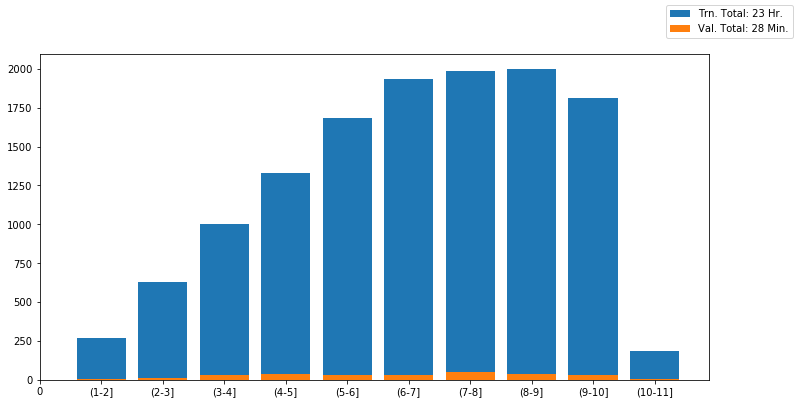

In [27]:
trn_duration_group_list = group_duration(trn_duration_list)
val_duration_group_list = group_duration(val_duration_list)

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(range(1,11), height=trn_duration_group_list, label=f"Trn. Total: {round(trn_total_duration/3600)} Hr.")
ax.bar(range(1,11), height=val_duration_group_list, label=f"Val. Total: {round(val_total_duration/60)} Min.")
ax.set_xticks(range(11))
ax.set_xticklabels(["0", "(1-2]", "(2-3]", "(3-4]", "(4-5]", "(5-6]", "(6-7]", "(7-8]", "(8-9]", "(9-10]", "(10-11]"])
fig.legend()
fig.show()

# 3. 訓練(Train)
* Train from scratch
* Load pre-train model and finetune

## 3.0 安裝&載入套件

In [28]:
# 這一格執行過一次就可以 Comment 起來，避免後續重複執行

# 取得 tacotron2.py 與 tacotron2.yaml 

# NeMo's training scripts are stored inside the examples/ folder. Let's grab the tacotron2.py file
# as well as the tacotron2.yaml file
# BRANCH = "main"

# !wget https://raw.githubusercontent.com/NVIDIA/NeMo/$BRANCH/examples/tts/tacotron2.py
# !(mkdir -p conf \
#   && cd conf \
#   && wget https://raw.githubusercontent.com/NVIDIA/NeMo/$BRANCH/examples/tts/conf/tacotron2.yaml \
#   && cd ..)

# # We will also need a few extra files for handling text.
# !(mkdir -p scripts/tts_dataset_files \
#   && cd scripts/tts_dataset_files \
#   && wget https://raw.githubusercontent.com/NVIDIA/NeMo/$BRANCH/scripts/tts_dataset_files/cmudict-0.7b_nv22.10 \
#   && wget https://raw.githubusercontent.com/NVIDIA/NeMo/$BRANCH/scripts/tts_dataset_files/heteronyms-052722 \
#   && cd ..)

# !(mkdir -p nemo_text_processing/text_normalization/en/data/whitelist/ \
#   && cd nemo_text_processing/text_normalization/en/data/whitelist/ \
#   && wget https://raw.githubusercontent.com/NVIDIA/NeMo/$BRANCH/nemo_text_processing/text_normalization/en/data/whitelist/lj_speech.tsv \
  && cd ..)

--2022-12-23 20:29:01--  https://raw.githubusercontent.com/NVIDIA/NeMo/main/examples/tts/tacotron2.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1874 (1.8K) [text/plain]
Saving to: ‘tacotron2.py’

tacotron2.py        100%[===================>]   1.83K  --.-KB/s    in 0s      

2022-12-23 20:29:02 (11.5 MB/s) - ‘tacotron2.py’ saved [1874/1874]

--2022-12-23 20:29:02--  https://raw.githubusercontent.com/NVIDIA/NeMo/main/examples/tts/conf/tacotron2.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5444 (5.3K) [text/plain]
Sav

## 3.1 Train from scratch
* 此部分之設定須同步參考 `conf/tacotron2.yaml` 的內容

In [29]:
!(python tacotron2.py \
  train_dataset=trn_dataset_LJ.json \
  validation_datasets=val_dataset_LJ.json \
  trainer.max_epochs=3 \
  trainer.accelerator=null \
  trainer.check_val_every_n_epoch=1 \
 +trainer.gpus=1)

[NeMo W 2022-12-23 20:30:46 optimizers:55] Apex was not found. Using the lamb or fused_adam optimizer will error out.
[NeMo W 2022-12-23 20:31:02 experimental:27] Module <class 'nemo.collections.common.tokenizers.text_to_speech.tts_tokenizers.IPATokenizer'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2022-12-23 20:31:02 experimental:27] Module <class 'nemo.collections.tts.models.radtts.RadTTSModel'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2022-12-23 20:31:03 nemo_logging:349] /home/aifree910884/.local/lib/python3.9/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    
[NeMo W 2022-12-23 20:31:03 nemo_logging:349] /home/aifree910884/.local/lib/python3.9/

In [30]:
!(python tacotron2.py \
  train_dataset=trn_dataset_LJ.json \
  validation_datasets=val_dataset_LJ.json \
  trainer.max_epochs=10 \
  trainer.accelerator=null \
  trainer.check_val_every_n_epoch=1 \
 +trainer.gpus=1)

[NeMo W 2022-12-23 21:12:57 optimizers:55] Apex was not found. Using the lamb or fused_adam optimizer will error out.
[NeMo W 2022-12-23 21:13:12 experimental:27] Module <class 'nemo.collections.common.tokenizers.text_to_speech.tts_tokenizers.IPATokenizer'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2022-12-23 21:13:12 experimental:27] Module <class 'nemo.collections.tts.models.radtts.RadTTSModel'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2022-12-23 21:13:12 nemo_logging:349] /home/aifree910884/.local/lib/python3.9/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    
[NeMo W 2022-12-23 21:13:12 nemo_logging:349] /home/aifree910884/.local/lib/python3.9/

In [31]:
!(python tacotron2.py \
  train_dataset=trn_dataset_LJ.json \
  validation_datasets=val_dataset_LJ.json \
  trainer.max_epochs=30 \
  trainer.accelerator=null \
  trainer.check_val_every_n_epoch=1 \
 +trainer.gpus=1)

[NeMo W 2022-12-23 23:11:12 optimizers:55] Apex was not found. Using the lamb or fused_adam optimizer will error out.
[NeMo W 2022-12-23 23:11:28 experimental:27] Module <class 'nemo.collections.common.tokenizers.text_to_speech.tts_tokenizers.IPATokenizer'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2022-12-23 23:11:28 experimental:27] Module <class 'nemo.collections.tts.models.radtts.RadTTSModel'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2022-12-23 23:11:28 nemo_logging:349] /home/aifree910884/.local/lib/python3.9/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    
[NeMo W 2022-12-23 23:11:28 nemo_logging:349] /home/aifree910884/.local/lib/python3.9/

In [32]:
!(python tacotron2.py \
  train_dataset=trn_dataset_LJ.json \
  validation_datasets=val_dataset_LJ.json \
  trainer.max_epochs=100 \
  trainer.accelerator=null \
  trainer.check_val_every_n_epoch=1 \
 +trainer.gpus=1)

[NeMo W 2022-12-24 04:47:13 optimizers:55] Apex was not found. Using the lamb or fused_adam optimizer will error out.
[NeMo W 2022-12-24 04:47:29 experimental:27] Module <class 'nemo.collections.common.tokenizers.text_to_speech.tts_tokenizers.IPATokenizer'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2022-12-24 04:47:29 experimental:27] Module <class 'nemo.collections.tts.models.radtts.RadTTSModel'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2022-12-24 04:47:29 nemo_logging:349] /home/aifree910884/.local/lib/python3.9/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    
[NeMo W 2022-12-24 04:47:29 nemo_logging:349] /home/aifree910884/.local/lib/python3.9/

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 73:  96%|██████▋| 268/279 [10:33<00:26,  2.36s/it, loss=0.428, v_num=7-29]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:   0%|                           | 0/11 [00:00<?, ?it/s][NeMo W 2022-12-24 18:17:35 tacotron2:341] Reached max decoder steps 1000.

Epoch 73:  96%|██████▋| 269/279 [10:36<00:23,  2.36s/it, loss=0.428, v_num=7-29][NeMo W 2022-12-24 18:17:36 tacotron2:341] Reached max decoder steps 1000.

Epoch 73:  97%|██████▊| 270/279 [10:37<00:21,  2.36s/it, loss=0.428, v_num=7-29][NeMo W 2022-12-24 18:17:38 tacotron2:341] Reached max decoder steps 1000.

Epoch 73:  97%|██████▊| 271/279 [10:38<00:18,  2.36s/it, loss=0.428, v_num=7-29][NeMo W 2022-12-24 18:17:39 tacotron2:341] Reached max decoder steps 1000.

Epoch 73:  97%|██████▊| 272/279 [10:40<00:16,  2.35s/it, loss=0.428, v_num=7-29][NeMo W 2022-12-24 18:17:40 tacotron2:341] Reached max decoder steps 1000.

Epoch 73:  98%|██████▊| 273/279 [10:41<00:14,  2.35s/it, loss=0.428, v_num=7-29][NeMo W 2022-12-24 18:17:42 

In [ ]:
!(python tacotron2.py \
  train_dataset=trn_dataset_LJ.json \
  validation_datasets=val_dataset_LJ.json \
  trainer.max_epochs=200 \
  trainer.accelerator=null \
  trainer.check_val_every_n_epoch=1 \
 +trainer.gpus=1)

[NeMo W 2022-12-24 22:59:44 optimizers:55] Apex was not found. Using the lamb or fused_adam optimizer will error out.
[NeMo W 2022-12-24 23:00:00 experimental:27] Module <class 'nemo.collections.common.tokenizers.text_to_speech.tts_tokenizers.IPATokenizer'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2022-12-24 23:00:00 experimental:27] Module <class 'nemo.collections.tts.models.radtts.RadTTSModel'> is experimental, not ready for production and is not fully supported. Use at your own risk.
[NeMo W 2022-12-24 23:00:00 nemo_logging:349] /home/aifree910884/.local/lib/python3.9/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    
[NeMo W 2022-12-24 23:00:00 nemo_logging:349] /home/aifree910884/.local/lib/python3.9/

## 3.2 Load pre-train model and finetune for a new speaker
* 若有額外 Dataset 則可參考 [Fastpitch Finetune Finetune](https://github.com/NVIDIA/NeMo/blob/main/tutorials/tts/FastPitch_Finetuning.ipynb)

# 4. 推論
* 此部分請參考[Text_to_Speech_for_Google_Colab](https://github.com/AI-FREE-Team/TTS-AIGO/blob/main/Text_to_Speech.ipynb)

# 5. 應用於原住民族語音生成的部份成果
* 此部分請參考[Text_to_Speech_for_Google_Colab](https://github.com/AI-FREE-Team/TTS-AIGO/blob/main/Text_to_Speech.ipynb)

# 6. 引用(Reference)
* [Nvidia Nemo](https://github.com/NVIDIA/NeMo/tree/main/examples/tts)
* **[1 Ref]** [Nemo TTS Primer](https://github.com/NVIDIA/NeMo/blob/main/tutorials/tts/NeMo_TTS_Primer.ipynb)
* **[2.2 Ref]** [Text Normalization Tutorial](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/text_processing/Text_(Inverse)_Normalization.ipynb#scrollTo=LvBfrQVybleF)
* **[3.0 Ref]** [Tacotron 2 Training](https://github.com/NVIDIA/NeMo/blob/main/tutorials/tts/Tacotron2_Training.ipynb)
* **[3.2 Ref]** [Finetuning FastPitch for a new speaker](https://github.com/NVIDIA/NeMo/blob/main/tutorials/tts/FastPitch_Finetuning.ipynb)
* **[4.1 Ref]** [Model Select](https://github.com/NVIDIA/NeMo/blob/main/tutorials/tts/Inference_ModelSelect.ipynb)
* **[4.1 Ref]** [Tacotron2 LJSpeech Overview](https://catalog.ngc.nvidia.com/orgs/nvidia/models/tacotron2_ljspeech)
* **[5 Ref]** [原住民族語E樂園](https://web.klokah.tw/essay/)